<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/manovaPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
df=pd.read_csv('Leinhardt.csv')
df.head()

,Unnamed: 0,income,infant,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


In [3]:
df.isnull().sum()

Unnamed: 0    0
income        0
infant        4
region        0
oil           0
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Unnamed: 0    0
income        0
infant        0
region        0
oil           0
dtype: int64

In [8]:
maov=MANOVA.from_formula('income+infant~region',
                         data=df)
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.4625 2.0000 96.0000 55.7795 0.0000
          Pillai's trace 0.5375 2.0000 96.0000 55.7795 0.0000
  Hotelling-Lawley trace 1.1621 2.0000 96.0000 55.7795 0.0000
     Roy's greatest root 1.1621 2.0000 96.0000 55.7795 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         region         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4454 6.0000 192.0000 15.9501 0.0000
         Pillai's trace 0.5864 6.0000 194.0000 13.4122 0.0000
 Hotelling-Lawley trace 1.

In [9]:
reg=ols('income~region',data=df).fit()

In [10]:
print(reg)

In [12]:
aov=sm.stats.anova_lm(reg,type=2)
print(aov)

            df        sum_sq       mean_sq          F        PR(>F)
region     3.0  9.602982e+07  3.200994e+07  28.207231  3.361691e-13
Residual  97.0  1.100769e+08  1.134813e+06        NaN           NaN


In [13]:
!pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 7.7 MB/s 


## Conjunto de datos de ejemplo MANOVA  

Supongamos que tenemos un conjunto de datos de varias variedades de plantas ( plant_var) y sus medidas fenotípicas asociadas para la altura de las plantas ( height) y el volumen del dosel ( canopy_vol). Queremos ver si las alturas de las plantas y el volumen del dosel están asociados con diferentes variedades de plantas usando MANOVA.

**Cargar conjunto de datos,**

In [16]:
import pandas as pd
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
df.head(15)

,plant_var,height,canopy_vol
0,A,20.0,0.70
1,A,22.0,0.80
2,A,24.0,0.95
3,A,18.0,0.60
4,A,20.0,0.74
5,A,20.0,0.76
6,A,16.0,0.84
7,A,17.0,0.66
8,A,18.0,0.99
9,A,14.0,0.80


**Estadísticas resumidas y visualización del conjunto de datos**  

Obtenga estadísticas resumidas basadas en cada variable dependiente,

In [19]:
from dfply import *
# summary statistics for dependent variable height 
df >> group_by(X.plant_var) >> summarize(n=X['height'].count(), mean=X['height'].mean(), std=X['height'].std())
# outputfrom dfply import *


,plant_var,n,mean,std
0,A,10,18.90,2.923088
1,B,10,16.54,1.920185
2,C,10,3.05,1.039498
3,D,10,9.35,2.106735


In [18]:
# summary statistics for dependent variable height 
df >> group_by(X.plant_var) >> summarize(n=X['height'].count(), mean=X['height'].mean(), std=X['height'].std())
# output

,plant_var,n,mean,std
0,A,10,18.90,2.923088
1,B,10,16.54,1.920185
2,C,10,3.05,1.039498
3,D,10,9.35,2.106735


In [14]:
from dfply import *

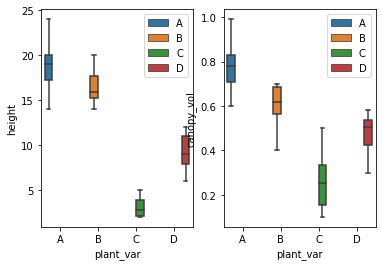

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df, x="plant_var", y="height", hue=df.plant_var.tolist(), ax=axs[0])
sns.boxplot(data=df, x="plant_var", y="canopy_vol", hue=df.plant_var.tolist(), ax=axs[1])
plt.show()

In [21]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('height + canopy_vol ~ plant_var', data=df)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

# **Pruebas post-hoc**
Aquí realizaremos el análisis discriminante lineal (LDA) usando sklearnpara ver las diferencias entre cada grupo. LDA discriminará los grupos usando información de ambas variables dependientes.



In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
X = df[["height", "canopy_vol"]]
y = df["plant_var"]
post_hoc = lda().fit(X=X, y=y)

In [23]:
# get Prior probabilities of groups:
post_hoc.priors_

array([0.25, 0.25, 0.25, 0.25])

In [24]:
post_hoc.means_

array([[18.9  ,  0.784],
       [16.54 ,  0.608],
       [ 3.05 ,  0.272],
       [ 9.35 ,  0.474]])

In [25]:
post_hoc.scalings_

array([[-0.43883736, -0.2751091 ],
       [-1.39491582,  9.32562799]])

In [26]:
post_hoc.explained_variance_ratio_

array([0.98545382, 0.01454618])

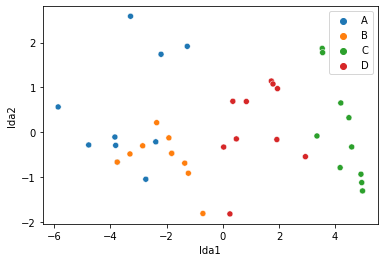

In [27]:
# plot 
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_new["plant_var"] = df["plant_var"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=df.plant_var.tolist())
plt.show()